HOJA DE TRABAJO 6 & 7 

Integrantes 
- Paola De Leon 20361
- Paola Contreras 20213

In [88]:
import time
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

In [89]:
observaciones = 1000
#start_time = time.time()
x1 = np.random.uniform(low=-10, high=10, size=(observaciones,1))
x2 = np.random.uniform(-10, 10, (observaciones,1))

X = np.column_stack((x1,x2))

print ("X:Shape ",X.shape)

ruido = np.random.uniform(-1, 1, (observaciones,1))
metas = 2 * x1 - 3 * x2 + 5 + ruido

# Veamos las dimensiones. Deben ser n x m, donde m es el número de variables de salida.
print ("Metas:shape ",metas.shape)

X:Shape  (1000, 2)
Metas:shape  (1000, 1)


In [90]:
x1N = x1.reshape(observaciones,)
x2N = x2.reshape(observaciones,)
metasN = metas.reshape(observaciones,)

fig = px.scatter_3d(x = x1N, y = x2N, z = metasN)

fig.update_layout(
    width = 500,
    height = 500,
    title="Scatter Plot Using 1,000,000 Observations")

fig.show()

In [91]:
rango_inicial = 0.1

pesos = np.random.uniform(low = -rango_inicial, high = rango_inicial, size=(2, 1))
sesgos = np.random.uniform(low = -rango_inicial, high = rango_inicial, size=1)

pesos.shape

(2, 1)

In [92]:
eta = 0.01
start_time = time.time()
## Entrenar el modelo
for i in range (100):
    
    # Esta es la ecuacion del modelo lineal: y = xw + b 
    y = np.dot(X, pesos) + sesgos
    
    # Las deltas son las diferencias entre las salidas y las metas (targets)
    # deltas es un vector 1000 x 1
    deltas = y - metas
        
    perdida = np.sum(deltas ** 2) / 2 / observaciones
    
    print(perdida)
    
    deltas_escaladas = deltas / observaciones
      
    pesos = pesos - eta * np.dot(X.T, deltas_escaladas)
    sesgos = sesgos - eta * np.sum(deltas_escaladas)
    end_time = time.time()
    execution_time = end_time - start_time

226.86228701398556
105.05325628337587
52.34395419720544
29.45697432277241
19.443656052898323
14.989690336882097
12.938181928951616
11.926423898762668
11.366096814234126
11.003150142911442
10.727838982328677
10.492723555277106
10.27726850659405
10.072558188008909
9.874696493476215
9.681956454503458
9.493549075682406
9.309091484444595
9.128377137491032
8.95127651247703
8.777694175634167
8.607550210041806
8.440772172056827
8.277291598621181
8.117042482181747
7.959960596618403
7.805983191458151
7.655048845652897
7.507097390654921
7.36206986374331
7.219908474705055
7.080556578555219
6.943958651125356
6.81006026614274
6.678808073199281
6.550149776344924
6.424034113186083
6.300410834432618
6.179230683864398
6.060445378700486
5.944007590359126
5.8298709255992565
5.717989908035247
5.608319960017179
5.500817384869353
5.39543934947982
5.292143867234032
5.190889781285776
5.091636748158711
4.994345221672009
4.898976437183625
4.8054923961450156
4.713855850961074
4.624030290149237
4.535979923791969
4

In [93]:
print("Execution time: ", execution_time,"secs")

Execution time:  0.00856161117553711 secs


In [94]:
yN = y.reshape(observaciones,)
metasN = metas.reshape(observaciones,)
fig = px.scatter(x = yN, y =  metasN)

fig.update_layout(
    width = 400,
    height = 400,
    title="Plot Using 1,000 Observations")

fig.show()

In [95]:
# execution_time = end_time - start_time
# print("Execution time: ", execution_time,"secs")

**TensorFlow**

In [37]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import tensorflow as tf

In [38]:
observaciones = 1000 

x1 = np.random.uniform(low = -10, high = 10, size = (observaciones,1))
x2 = np.random.uniform(-10, 10, (observaciones,1)) # nótese que no se requieren las palabras clave

X = np.column_stack((x1,x2))


In [39]:
ruido = np.random.uniform(-1, 1, (observaciones,1))

y = 2 * x1 - 3 * x2 + 5 + ruido
np.savez('Datos_TF', entradas = X, targets = y) 

In [40]:
datos = np.load('Datos_TF.npz')

tamanio_entrada = 2
tamanio_salida = 1

In [41]:
modelo = tf.keras.Sequential([
                           
                            tf.keras.layers.Dense(tamanio_salida,
                                                 kernel_initializer = tf.random_uniform_initializer(minval = -0.1, maxval = 0.1),
                                                 bias_initializer = tf.random_uniform_initializer(minval = -0.1, maxval = 0.1)
                                                 )
                            ])

In [42]:
optimizador_adhoc = tf.keras.optimizers.SGD(learning_rate = 0.0001) #se cambia a 0.0001
modelo.compile(optimizer = optimizador_adhoc, loss='huber_loss')
#modelo.compile(optimizer = optimizador_adhoc, loss='mean_squared_error')
modelo.fit(datos['entradas'], datos['targets'], epochs = 100, verbose = 2)

Epoch 1/100
32/32 - 0s - loss: 16.8706 - 474ms/epoch - 15ms/step
Epoch 2/100
32/32 - 0s - loss: 16.8044 - 32ms/epoch - 991us/step
Epoch 3/100
32/32 - 0s - loss: 16.7390 - 27ms/epoch - 844us/step
Epoch 4/100
32/32 - 0s - loss: 16.6724 - 21ms/epoch - 663us/step
Epoch 5/100
32/32 - 0s - loss: 16.6068 - 24ms/epoch - 752us/step
Epoch 6/100
32/32 - 0s - loss: 16.5417 - 21ms/epoch - 670us/step
Epoch 7/100
32/32 - 0s - loss: 16.4761 - 64ms/epoch - 2ms/step
Epoch 8/100
32/32 - 0s - loss: 16.4106 - 28ms/epoch - 870us/step
Epoch 9/100
32/32 - 0s - loss: 16.3448 - 20ms/epoch - 623us/step
Epoch 10/100
32/32 - 0s - loss: 16.2792 - 23ms/epoch - 727us/step
Epoch 11/100
32/32 - 0s - loss: 16.2142 - 20ms/epoch - 623us/step
Epoch 12/100
32/32 - 0s - loss: 16.1490 - 24ms/epoch - 757us/step
Epoch 13/100
32/32 - 0s - loss: 16.0837 - 20ms/epoch - 626us/step
Epoch 14/100
32/32 - 0s - loss: 16.0182 - 21ms/epoch - 654us/step
Epoch 15/100
32/32 - 0s - loss: 15.9533 - 24ms/epoch - 736us/step
Epoch 16/100
32/32 - 

In [43]:
modelo.layers[0].get_weights() 

[array([[ 0.68874884],
        [-1.1670474 ]], dtype=float32),
 array([0.1418783], dtype=float32)]

In [44]:
pesos = modelo.layers[0].get_weights()[0]
pesos

array([[ 0.68874884],
       [-1.1670474 ]], dtype=float32)

In [45]:
sesgos = modelo.layers[0].get_weights()[1]
sesgos

array([0.1418783], dtype=float32)

In [46]:
modelo.predict_on_batch(datos['entradas']).round(1)[:5, :]

array([[  8.9],
       [-12.2],
       [  5.9],
       [  1.3],
       [  2.4]], dtype=float32)

In [47]:
datos['targets'].round(1)[:5, :]

array([[ 28.8],
       [-27.7],
       [ 22.5],
       [  8.5],
       [ 13.2]])

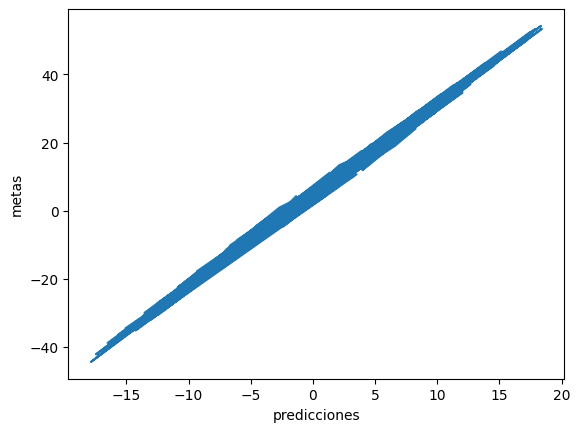

In [48]:
plt.plot(np.squeeze(modelo.predict_on_batch(datos['entradas'])), 
         np.squeeze(datos['targets']))
plt.xlabel('predicciones')
plt.ylabel('metas')
plt.show()